# Linear Regression

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

# Generate Training Data 

In [4]:
X,Y = make_regression(n_samples=200,n_features=1,noise=25.5,n_informative=1,random_state=1)

print(X.shape)
print(Y.shape)

(200, 1)
(200,)


# Visualise Training Data

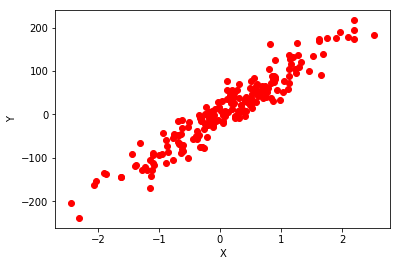

In [5]:
plt.scatter(X,Y,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Gradient Descendent Algorithm 
      - Start with random theta
      - Repeat until convergence of error function
                 - Update theta according to rule

In [6]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [7]:
def error(X,Y,theta):
    
    m = X.shape[0]
    e = 0
    for i in range(m):
        
        yh = hypothesis(X[i],theta)
        e += (yh-Y[i])**2
    return e

In [8]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2))
    
    for i in range (X.shape[0]):
        
        hyp = hypothesis(X[i],theta)
        
        grad[0] += (hyp - Y[i])
        grad[1] += (hyp -Y[i])*X[i]
        
    return grad

In [9]:
def prediction(X_test,theta):
    
    y_pred = []
    
    for i in range (X_test.shape[0]):
        
        yh = hypothesis(X_test[i],theta)
        y_pred.append(yh)
        
    y_pred = np.array(y_pred)
    
    return y_pred
    

In [10]:
#Algorithm

def gradientDescent(X,Y,learning_rate = 0.001,max_itr=100):
    
    theta = np.zeros((2))
    
    itr = 0
    error_list = []
        
    while(itr < 2):
        
        e = error(X,Y,theta)
        error_list.append(e)
        
        grad = gradient(X,Y,theta)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr += 1
        
    while((error_list[-1] - error_list[-2]) < 0.002 and itr <= max_itr):
        e = error(X,Y,theta)
        error_list.append(e)
            
        grad = gradient(X,Y,theta)
            
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        if( itr % 6 == 0):
            plt.figure(1)
            plt.scatter(X,Y,color='green')
            plt.plot(X,prediction(X,theta),color='red')
            plt.show()
            plt.pause(2)
        itr +=1
    return error_list,theta

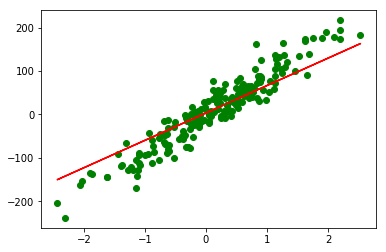

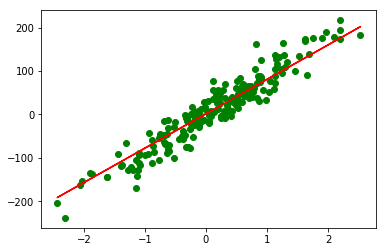

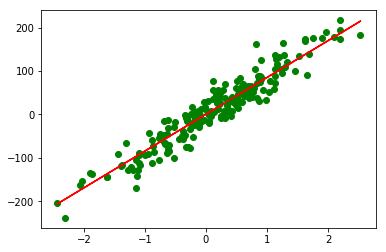

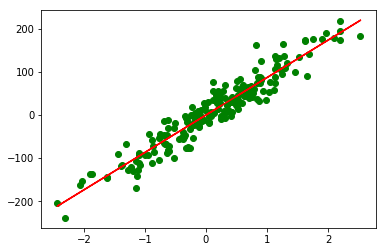

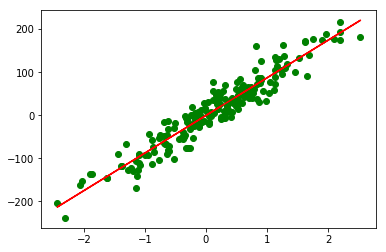

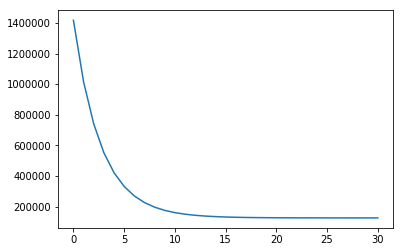

In [11]:
err,theta_final = gradientDescent(X,Y,max_itr=30)
plt.plot(err)
plt.show()

# Predictions on Testing Data

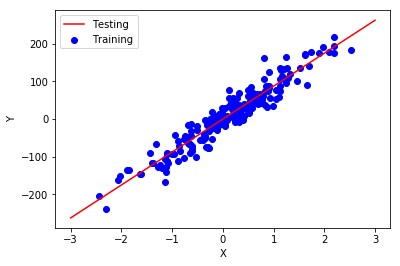

In [28]:
X_test = np.linspace(-3,3,20)
Y_pred = prediction(X_test,theta_final)

plt.scatter(X,Y,color='blue',label="Training")
plt.plot(X_test,Y_pred,color='red',label="Testing")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Accuracy

In [13]:
num = 0 
den = 0
m = X.shape[0]
y_avg = 0

for i in range(m):
    
    y_avg +=Y[i]
    
    num += (Y[i] - hypothesis(X[i],theta_final))**2
    
y_avg = y_avg/m

for i in range(m):
    
    den += (Y[i] - y_avg)**2

score = 1 - (num/den)

print("Score :%.2f"%score)
print("Accuracy :%d"%(score*100))

Score :0.91
Accuracy :90


# Closed From Solution

In [20]:
ones = np.ones((X.shape[0],1))

In [21]:
X_train =  np.hstack((ones,X))

print(X.shape)
print(X_train.shape)

(200, 1)
(200, 2)


In [24]:
theta = np.dot(np.linalg.pinv(np.dot(X_train.T,X_train)),np.dot(X_train.T,Y))

In [26]:
print(theta)
print(theta.shape)

[-0.53165284 87.75805398]
(2,)


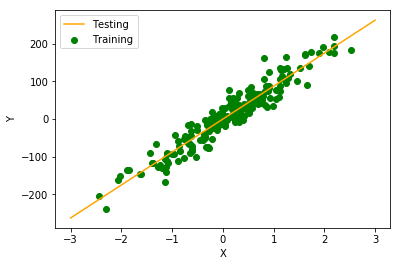

In [31]:
pred = prediction(X_test,theta)

plt.scatter(X,Y,color='green',label="Training")
plt.plot(X_test,Y_pred,color='orange',label="Testing")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [32]:
num = 0 
den = 0
m = X.shape[0]
y_avg = 0

for i in range(m):
    
    y_avg +=Y[i]
    
    num += (Y[i] - hypothesis(X[i],theta))**2
    
y_avg = y_avg/m

for i in range(m):
    
    den += (Y[i] - y_avg)**2

score = 1 - (num/den)

print("Score :%.2f"%score)
print("Accuracy :%d"%(score*100))

Score :0.91
Accuracy :90
